In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
# Read data from input file
ws_cust = pd.read_excel("./Data/wholesale_customers.xls")
ws_cust.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,3,12669,9656,7561,214,2674
1,3,7057,9810,9568,1762,3293
2,3,6353,8808,7684,2405,3516
3,3,13265,1196,4221,6404,507
4,3,22615,5410,7198,3915,1777


In [11]:
ws_cust=ws_cust[['Milk','Frozen','Detergents_Paper']]
ws_cust.head()

,Milk,Frozen,Detergents_Paper
0,9656,214,2674
1,9810,1762,3293
2,8808,2405,3516
3,1196,6404,507
4,5410,3915,1777


In [12]:
ws_cust.describe()

,Milk,Frozen,Detergents_Paper
count,440.000000,440.000000,440.000000
mean,5796.265909,3071.931818,2881.493182
std,7380.377175,4854.673333,4767.854448
min,55.000000,25.000000,3.000000
25%,1533.000000,742.250000,256.750000
50%,3627.000000,1526.000000,816.500000
75%,7190.250000,3554.250000,3922.000000
max,73498.000000,60869.000000,40827.000000


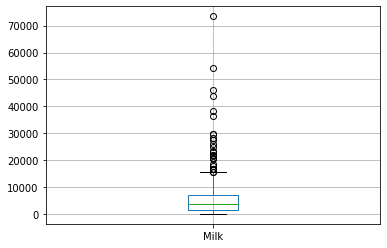

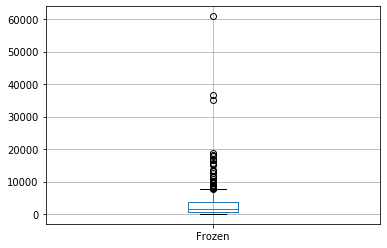

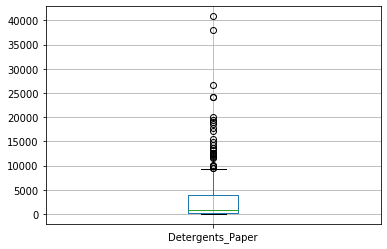

In [13]:
for column in ws_cust:
    plt.figure()
    ws_cust.boxplot([column])

In [14]:
# Applying filter on the basis of following criteria
ws_cust = ws_cust[(ws_cust['Milk'] <= 15000) & (ws_cust['Detergents_Paper']<=10000) & (ws_cust['Frozen']<=8000)]
ws_cust['Milk'].count()

364

In [15]:
kmeans = KMeans(n_clusters=5,max_iter=20).fit(ws_cust)
centroids = kmeans.cluster_centers_
print(centroids)
SSE = kmeans.inertia_
print(SSE)

[[ 4979.79746835  1036.24050633  1645.10126582]
 [11379.95        1497.75        5584.475     ]
 [ 1461.34013605  1603.10204082   466.08163265]
 [ 2880.65957447  5609.85106383   698.61702128]
 [ 6666.47058824  1498.66666667  5478.45098039]]
1720930179.5214279


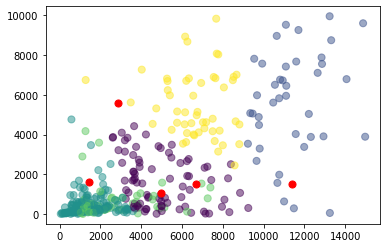

In [16]:
plt.scatter(ws_cust['Milk'], ws_cust['Detergents_Paper'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

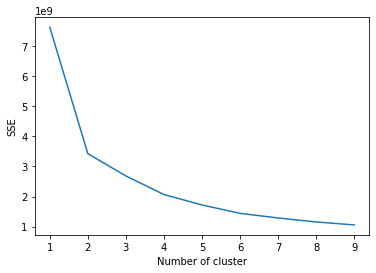

In [17]:
import warnings
warnings.filterwarnings('ignore')

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ws_cust)
    ws_cust["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()